# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Théo Verhelst - __[Theo.Verhelst@ulb.ac.be](mailto:Theo.Verhelst@ulb.ac.be)__
### Gianluca Bontempi - __[gbonte@ulb.ac.be](mailto:gbonte@ulb.ac.be)__

## TP 3 - Predictions: Tree-based methods

####  March 23, 2021

#### Materials originally developed by *Bertrand Lebichot, Jacopo De Stefani and Gianluca Bontempi*

## Preliminaries

### Supervised learning

The process of supervised learning involves the presence of an entity (the learner, also called prediction model), whose goal is to learn the mapping between inputs and outputs in a given problem.

A supervised learning problem can formulated as follows:

\begin{equation*}
 y = m(\mathbf{x})  
\end{equation*}

where:
- $y$ represents the output variable (also called target)
- $\mathbf{x}$ represents the vector of inputs (also called features).
- $m$ is the (unknown) mapping between input and outputs.

In the majority of the supervised learning problems, the mapping $m$ between input and outputs is unknown and needs to be estimated on basis of the available input/output observation pairs $(\mathbf{x}_i,y_i)$.

## Classification vs regression

Both classification and regression are sub-fields of *supervised learning*. In the two cases, we have predictive variables $\mathbf{x}$ and a target variable $y$. 
The main difference betweet the two type of problems is the type of the target variabile:

- In classification, $y$ is a discrete variable; i.e $y \in \{C_1,\cdots,C_k\}$
- In regression, $y$ is a continuous variable; i.e $y \in \mathbb{R}$

In this practical, in order to better understand the classification process, we will tackle the simplest classification case, with $k=2$ possible output classes (called binary classification).

The goal of our approach is to be able to learn the mapping between the input features and the predefined discrete output classes, in order to be able to perform an automatic classification, based on the available data. 

Let's illustrate the problem with a simple example :
* Knowing the two abstract features $X_1$ and $X_2$, and $n=6$ samples for both class (the red class and the blue class), can you predict the label for the green sample ?


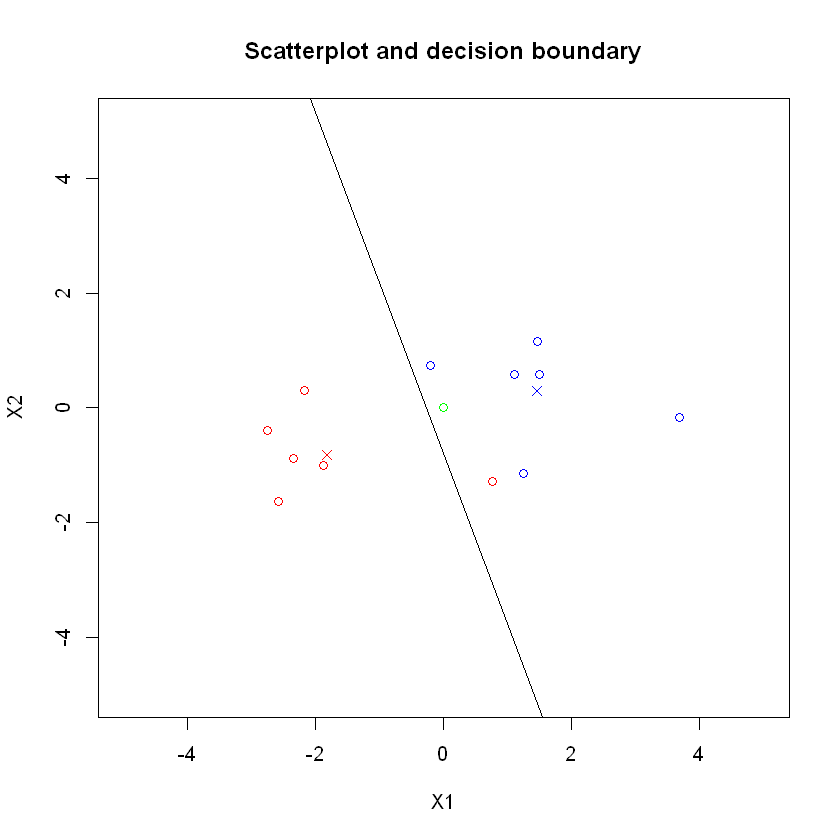

In [1]:
#options(repr.plot.width=20, repr.plot.height=10)
n = 6

# blue class data
X1 = rnorm(n, mean = +2, sd = 1)
X2 = rnorm(n, mean = +1, sd = 1)
SamplesBLUE = data.frame(X1, X2)
gBLUE = c(mean(X1),mean(X2))

# red class data
X1 = rnorm(n, mean = -2, sd = 1)
X2 = rnorm(n, mean = -1, sd = 1)
SamplesRED = data.frame(X1, X2)
gRED = c(mean(X1),mean(X2))

# draw scatterplot
plot(SamplesBLUE$X1,SamplesBLUE$X2,col="blue",main="Scatterplot and decision boundary",xlab="X1",ylab="X2",xlim=c(-5,5),ylim=c(-5,5))
points(SamplesRED$X1,SamplesRED$X2,col="red")
points(0,0,col="green")

# draw centroid of classes
points(gBLUE[1],gBLUE[2],col="blue",pch = 4)
points(gRED[1],gRED[2],col="red",pch = 4)

# draw decision boundary
midgg = c(gRED[1]+abs(gBLUE[1]-gRED[1])/2,gRED[2]+abs(gBLUE[2]-gRED[2])/2)
slope = -(gBLUE[1]-gRED[1])/(gBLUE[2]-gRED[2])
abline(a=midgg[2]-slope*midgg[1],b=slope)


## Classification metrics

### Confusion Matrix 

A confusion matrix $\mathbf{C}$ is a $k \times k$ matrix containing the classifications statistics of a given classifier.
$c_{ij}$ containes the number of times that a sample belonging to the actual class $j$ has been predicted as belonging to class $i$.

In our two-class setting, the confusion matrix (reporting the number of actual class / predicted class) has four entries:
 
|            | Actual Negative   | Actual Positive  |
|:----------:|-------------------|-----------------|
|**Classified Negative** | $T_N$ (True Negative) | $F_N$ (False Negative)| 
|**Classified Positive** | $F_P$ (False Positive) | $T_P$ (True Positive) |

Ideally, if the classifier didn't make any mistake, the confusion matrix $\mathbf{C}$ should be diagonal.
By looking at the off-diagonal elements, we can understand which kind of mistakes the classifier is making (e.g. Actual Negative -> Predicted Positive, Actual Positive -> Predicted Negative).

Additionally, the confusion matrix allows to compute the total number of elements classified negative $\hat{N_N}$, classified positive $\hat{N_P}$, actual negative $N_N$, actual positive $N_P$, as well as the total number of samples $N$.

\begin{align*}
\hat{N_N} = T_N + F_N & & & \hat{N_P} = T_P + F_P \\ 
N_N = T_N + F_P & & & N_P = T_P + F_N \\
\end{align*}

\begin{equation}
N = T_N + F_N + T_P + F_P 
\end{equation}

The quantities in the confusion matrix are used to define different accuracy measures, such as:

#### Accuracy

\begin{equation}
A = \frac{T_P + T_N}{N} = \frac{T_P + T_N}{F_P + F_N + T_P + T_N} 
\end{equation}

The accuracy represents the ratio between the number of correctly classified samples (False ...) and the total number of samples.

#### Misclassification Rate

\begin{equation}
ER = \frac{F_P + F_N}{N} = \frac{F_P + F_N}{F_P + F_N + T_P + T_N} 
\end{equation}

The misclassification rate represents the number of total classification mistakes (False ...) over the total number of samples.
It can be shown that ER=1-A.

#### Balanced Error Rate
\begin{equation}
BER = \frac{1}{2}(\frac{F_P}{N_N} + \frac{F_N}{N_P}) = \frac{1}{2}(\frac{F_P}{T_N + F_P} + \frac{F_N}{T_P + F_N}) 
\end{equation}

The balanced error rate is computed as an average of the error for each classes.
For unbalanced classification problems (i.e. $N_N \neq N_P$ the total number of samples belonging to the negative and positive classes is different).

#### Sensitivity and specificity
\begin{align}
SE = \frac{T_P}{N_P} = \frac{T_P}{T_P + F_N} & & & 0 \leq SE \leq 1 
\end{align}

The sensitivity (also called recall) is a measure defined as the ratio between the correctly classified positive samples over the total number of positive samples (i.e True Positive rate). It measures the impact of false negatives on the classification process.

\begin{align}
SP = \frac{T_N}{N_N} = \frac{T_N}{F_P + T_N}  & & & 0 \leq SP \leq 1
\end{align}

The specificity is a measure defined as the ratio between the correctly classified negative samples over the total number of negative samples (i.e True Negative rate). It measures the impact of false positive on the classification process.

The need for different accuracy measures arises from the fact that the impact of a certain type of error (e.g. Actual Negative -> Predicted Positive, Actual Positive -> Predicted Negative) might be greatly different, according to the context in which the classification problem is performed (for example medical diagnosis, fraud detection).


## Dataset

The chosen database is about spam detection. Details can be found here :
https://archive.ics.uci.edu/ml/datasets/spambase

To import the dataset, just use package ''kernlab''

`install.packages("kernlab")`

In case of doubts, always remember that R can provide you with the documentation of a function package/using the following syntax:
`? name_of_function` or `help(name_of_function)` 

In [2]:
library("kernlab")
library("tree")
library("rpart")
data(spam)

Warning message:
"package 'tree' was built under R version 4.0.5"
Warning message:
"package 'rpart' was built under R version 4.0.4"


## Exercise 0 - Exploratory Data Anaylsis 

You first have to explore the dataset before going to classification. This step can be long but is actually very important. In particular, obtain or observe the following interesting elements :
* Number of rows and columns
* Is there any missing values ?
* Spam prior
* Name and basic statistics for each variables
* Histogram (or other relevant plot) per class (spam vs non-spam)

### Number of rows and columns

In [3]:
dim(spam)

[1] 4601   58

### Presence of missing values

In [4]:
# No missing values -> dim(na.omit(dataset)) == dim(dataset)
dim(na.omit(spam))

[1] 4601   58

In [5]:
# 2nd Check
apply(is.na(spam),2,any)

make           address               all             num3d 
            FALSE             FALSE             FALSE             FALSE 
              our              over            remove          internet 
            FALSE             FALSE             FALSE             FALSE 
            order              mail           receive              will 
            FALSE             FALSE             FALSE             FALSE 
           people            report         addresses              free 
            FALSE             FALSE             FALSE             FALSE 
         business             email               you            credit 
            FALSE             FALSE             FALSE             FALSE 
             your              font            num000             money 
            FALSE             FALSE             FALSE             FALSE 
               hp               hpl            george            num650 
            FALSE             FALSE             FALSE             FALSE 
              lab              labs            telnet            num857 
            FALSE             FALSE             FALSE             FALSE 
             data            num415             num85        technology 
            FALSE             FALSE             FALSE             FALSE 
          num1999             parts                pm            direct 
            FALSE             FALSE             FALSE             FALSE 
               cs           meeting          original           project 
            FALSE             FALSE             FALSE             FALSE 
               re               edu             table        conference 
            FALSE             FALSE             FALSE             FALSE 
    charSemicolon  charRoundbracket charSquarebracket   charExclamation 
            FALSE             FALSE             FALSE             FALSE 
       charDollar          charHash        capitalAve       capitalLong 
            FALSE             FALSE             FALSE             FALSE 
     capitalTotal              type 
            FALSE             FALSE

### Structure of the dataset

In [6]:
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [7]:
summary(spam)

      make           address            all             num3d         
 Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.00000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.: 0.00000  
 Median :0.0000   Median : 0.000   Median :0.0000   Median : 0.00000  
 Mean   :0.1046   Mean   : 0.213   Mean   :0.2807   Mean   : 0.06542  
 3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.:0.4200   3rd Qu.: 0.00000  
 Max.   :4.5400   Max.   :14.280   Max.   :5.1000   Max.   :42.81000  
      our               over            remove          internet      
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median :0.0000   Median :0.0000   Median : 0.0000  
 Mean   : 0.3122   Mean   :0.0959   Mean   :0.1142   Mean   : 0.1053  
 3rd Qu.: 0.3800   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000  
 Max.   :10.0000   Max.   :5.8800   Max.   :7.2700   Max.   :11.1100  
     o

### Spam Prior


nonspam    spam 
   2788    1813 

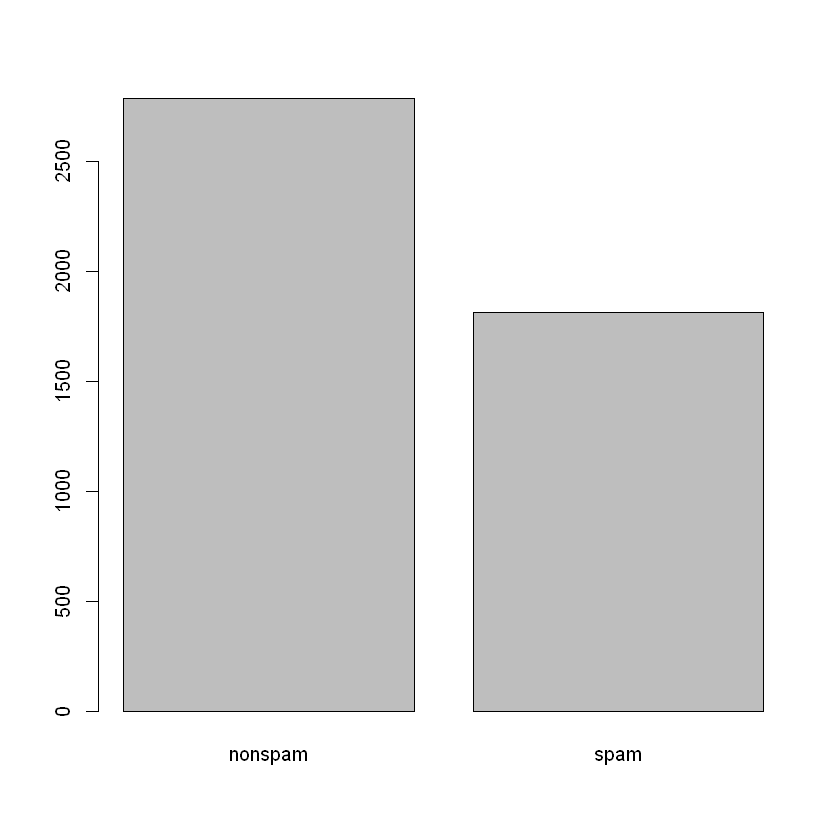

In [8]:
table(spam$type)
plot(spam$type)

### Histogram (or other relevant) plots of the variables with respect to the target


Attaching package: 'ggplot2'


The following object is masked from 'package:kernlab':

    alpha


Warning message:
"package 'GGally' was built under R version 4.0.4"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



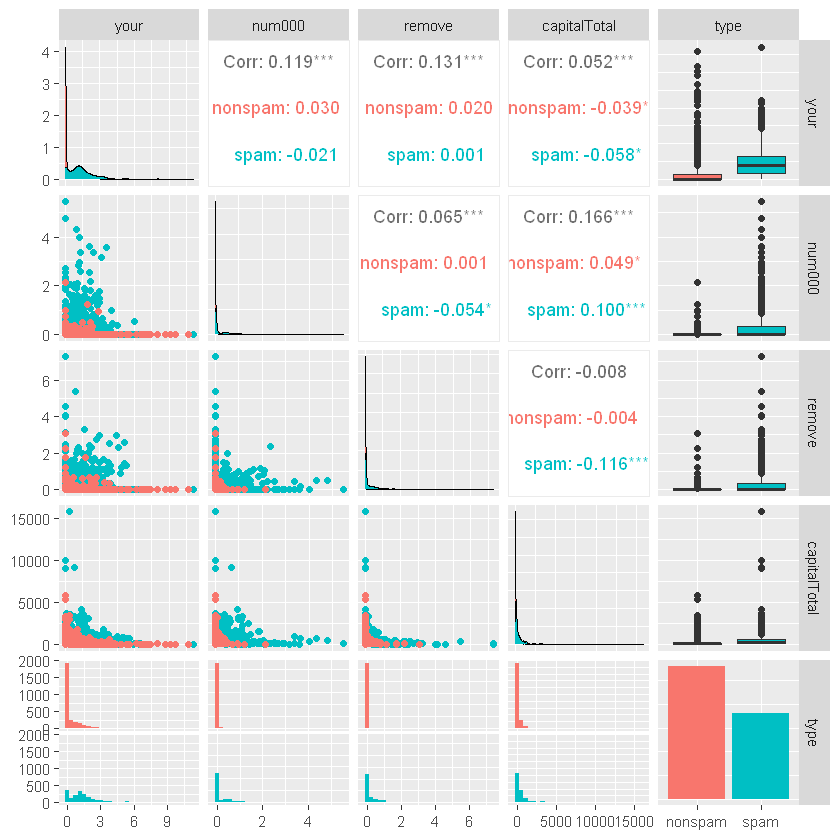

In [9]:
library("ggplot2"); library("GGally")
ggpairs(spam[,c(21,23,7,57,58)],aes(colour = type))

## Classification trees 

### Model structure

A classification tree is a model employing a tree-based structure in order to perform classification of the target variable.
The tree structure contains internal nodes, and terminal nodes (often called leaves).

Each internal node is associated to a feature in the input vector $\mathbf{x}$, and performs a partition of the input space according to the value of the associated feature.
Each terminal node is associated to a specific output label $C_i$.
Internal nodes can be concatenated with each other in order to specify additional partitions of the input space.

By combining these definitions, we can notice that the terminal nodes partitions the input space into mutually exclusive regions (in a divide-and-conquer fashion). 

The classification operation is performed by traversing the tree from the root node until one of the terminal nodes is reached.
At each intermediate internal node, a decision is made according to the value associated to the corresponding feature (for example, for the i-th feature $x_i \geq 0$).
According to the outcome of this decision, a different path in the tree is taken.
The tree traversal is stopped once a terminal node is reached, and the output of the classifier correspond to the label associated to the terminal node (e.g. $C_0$).

Hence, by simply looking at the tree structure, we can easily understand the sequence of operations (i.e. splits) that yielded to the classification decision, improving interpretability of the model.

### Learning procedure

As an analogy to their biological equivalent, the learning procedure for a decision tree has two steps known as *tree growing* and *tree pruning*.

* During *tree growing*, an iterative, exhaustive search is performed to find the successive splits, selecting the one that minimizes a certain cost function.
  
  Here you can find two examples of commonly used cost functions, with $p_i$ representing the probability of selecting a sample of class $i$ in the input space subset defined by the considered split:

    * The **Gini Impurity** (used in CART) : how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It is minimum (zero) for class-homogeneous nodes.
    
    \begin{equation}
         Gini = \sum_{i=1}^C p_i * (1-p_i) = 1-\sum_{i=1}^C p_i^2\\
    \end{equation}

    * The **information gain** (IG, used in ID3,C4.5) : based on the concept of entropy and information content from information theory. Basically the IG is the entropy of the parent node minus the weighted sum of the children node entropy.

    \begin{equation}
         IG = -\sum_{i=1}^C p_i * log_2 (p_i) - \sum_{a} p(a) \sum_{i=1}^C Pr(i|a) * log_2 (Pr(i|a))  \\
    \end{equation}
   

* During *tree pruning*, some branches of the decision tree are removed, based on a complexity based measure of the tree performance, in order to avoid overfitting.


An animated version of decision trees can be found here : http://www.r2d3.us/visual-intro-to-machine-learning-part-1/



## Exercise 1 - Classification with decision trees

On the given dataset, our classification task will be to discriminated between spam and non-spam samples ($k=2$ classes - binary classificiation task).
Among the difference performance metric presented, we will be using the misclassification rate. 

In order to study the generalization capabilities of our learning model, we will be dividing our dataset in two part :

* *training set* : Sample of data that we will be using to perform the training of the model, presenting to the model the $(\mathbf{x}_i,y_i)$ pairs.
* *test set* : Sample of data, unseen by the model, used to assess the predictions made by the training model.

In order to obtain a more statistically sound estimation of the performance of the model, this procedure is often repeated several times, with different training-test splits (k-fold cross-validation).

For this exercise, we will ask you to:

* First, obtain the performance of a DT on the spam dataset using a 50%/50% training-test partition. 
* Check the importance of each feature using the obtained DT using *rpart* or *tree*.
* Then plot the obtained tree using packages *rpart.plot*.
* Finally, implement a 10-fold cross-validation for assessing your DT.

**N.B.** The selected classifier actually outputs an estimation of the conditional probabilities $p(y_i=C_0|\mathbf{x})$ and $p(y_i=C_1|\mathbf{x_i})$, $C_0 and C_1$ being respectively "nonspam" and "spam". In order to transform the conditional probability into the corresponding class, we will define a threshold $t=0.5$. If $p(y_i=C_1|\mathbf{x_i}) > t$ than the sample $\mathbf{x_i}$ will be affected to the class "spam", otherwise it will be affected to the "non spam" category.
 


In [10]:
library(rpart)

spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]

model <- rpart(type ~ ., method="class",data=train_data)


Classification tree:
rpart(formula = type ~ ., data = train_data, method = "class")

Variables actually used in tree construction:
[1] capitalAve      charDollar      charExclamation free           
[5] hp              remove         

Root node error: 903/2300 = 0.39261

n= 2300 

        CP nsplit rel error  xerror     xstd
1 0.450720      0   1.00000 1.00000 0.025935
2 0.083056      1   0.54928 0.55814 0.021969
3 0.050941      3   0.38317 0.39424 0.019210
4 0.035437      4   0.33223 0.34884 0.018259
5 0.024363      5   0.29679 0.33887 0.018037
6 0.021041      6   0.27243 0.32337 0.017682
7 0.014396      7   0.25138 0.29125 0.016901
8 0.010000      8   0.23699 0.26910 0.016326
Call:
rpart(formula = type ~ ., data = train_data, method = "class")
  n= 2300 

          CP nsplit rel error    xerror       xstd
1 0.45071982      0 1.0000000 1.0000000 0.02593525
2 0.08305648      1 0.5492802 0.5581395 0.02196933
3 0.05094131      3 0.3831672 0.3942414 0.01920974
4 0.03543743      4 0.3322

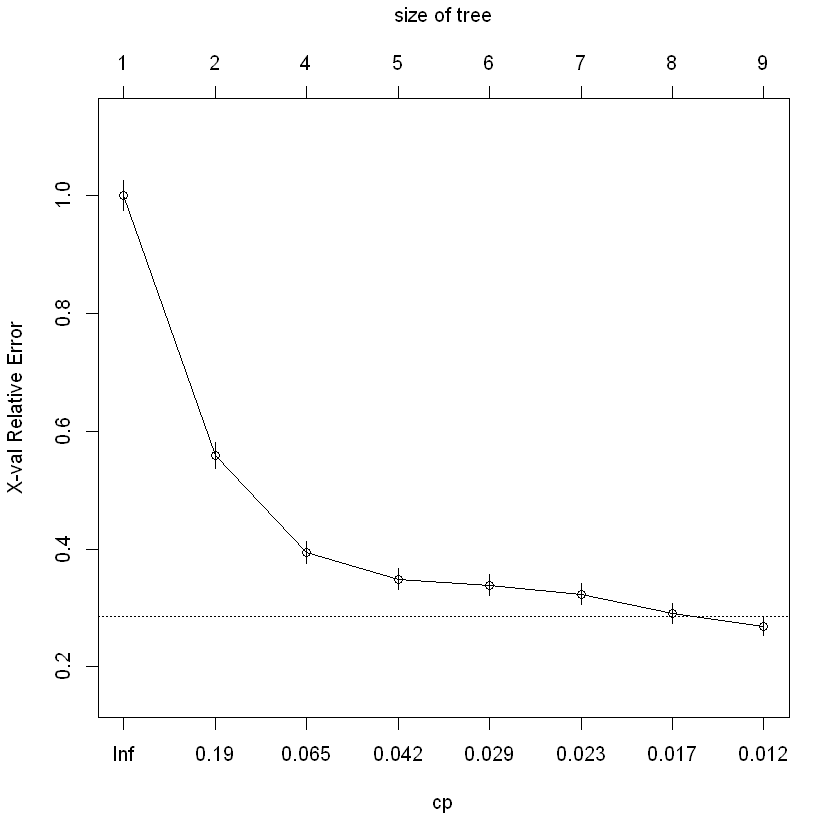

In [11]:
printcp(model) # display the results
plotcp(model) # visualize cross-validation results
summary(model) # detailed summary of splits

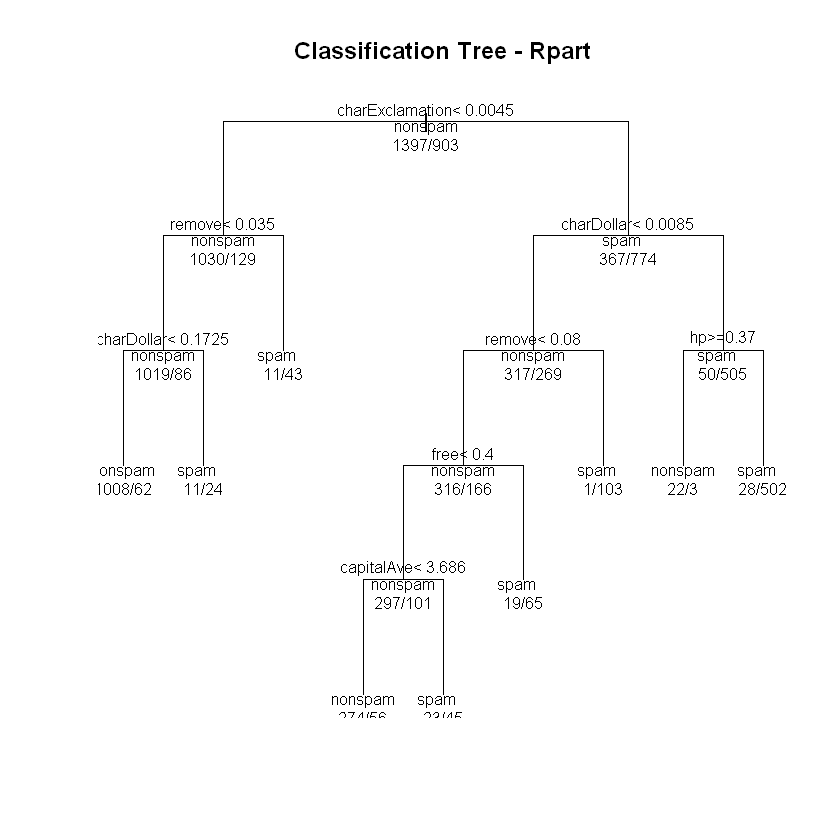

In [12]:
# plot tree
plot(model, uniform=TRUE,
   main="Classification Tree - Rpart")
text(model, use.n=TRUE, all=TRUE, cex=.8)

In [13]:
data.frame(model$variable.importance)

,model.variable.importance
,<dbl>
charExclamation,369.7542255
charDollar,276.1117487
capitalLong,202.1765364
free,166.8168531
your,163.3270199
you,135.4577268
remove,124.5453816
num000,59.9175289
capitalTotal,53.6622872


In [14]:
Y_pred <- predict(model,test_data[,-target_variable])
Y <- test_data[,target_variable]
threshold <- 0.5

In [15]:
head(Y_pred)

,nonspam,spam
2535,0.94205607,0.05794393
708,0.05283019,0.94716981
4187,0.94205607,0.05794393
29,0.22619048,0.77380952
1333,0.94205607,0.05794393
99,0.22619048,0.77380952


In [16]:
head(Y)

[1] nonspam spam    nonspam spam    spam    spam   
Levels: nonspam spam

In [17]:
Y_hat <- ifelse(Y_pred[,2] > threshold,"spam","nonspam") 

confusion_matrix <- table(Y_hat,Y)
confusion_matrix

         Y
Y_hat     nonspam spam
  nonspam    1285  149
  spam        106  761

In [18]:
# compute misclassification rate
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
misclassification_rate

[1] 0.1108214

### 10-fold CV

In [19]:
k = 10
target_variable <- ncol(spam)
accuracy_vec <- array(0,k)
threshold <- 0.5

# 1. Shuffle the dataset randomly.
spam_idx <- sample(1:nrow(spam))

# 2. Split the dataset into k groups
max <- ceiling(nrow(spam)/k)
splits <- split(spam_idx, ceiling(seq_along(spam_idx)/max))

# 3. For each unique group:
for (i in 1:k){
    #3.1 Take the group as a hold out or test data set
    test_data <- spam[splits[[i]],]
    
    #3.2 Take the remaining groups as a training data set
    train_data <- spam[-splits[[i]],]
    print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
    
    #3.3 Fit a model on the training set and evaluate it on the test set
    model <- rpart(type ~ ., method="class",data=train_data)
    Y_pred <- predict(model,test_data[,-target_variable])
    Y <- test_data[,target_variable]
    
    #3.4 Store the prediction of the tree (2 is to take only the P(Y="spam"|x))
    Y_hat <- ifelse(Y_pred[,2] > threshold,"spam","nonspam") 
    confusion_matrix <- table(Y_hat,Y)
    print(confusion_matrix)
    
    #3.5 Retain the evaluation score and discard the model
    accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
    misclassification_rate = 1 - accuracy_vec[i]
    print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
}

#4. Summarize the skill of the model using the sample of model evaluation scores
print(paste("[INFO] - Mean misclassification rate:",1-mean(accuracy_vec)))



[1] "[INFO] - Training set size: 4140 - Testing set size 461"
         Y
Y_hat     nonspam spam
  nonspam     247   31
  spam         14  169
[1] "[INFO] - Misclassification rate - 1 fold: 0.0976138828633406"
[1] "[INFO] - Training set size: 4140 - Testing set size 461"
         Y
Y_hat     nonspam spam
  nonspam     272   24
  spam         22  143
[1] "[INFO] - Misclassification rate - 2 fold: 0.0997830802603037"
[1] "[INFO] - Training set size: 4140 - Testing set size 461"
         Y
Y_hat     nonspam spam
  nonspam     254   34
  spam         16  157
[1] "[INFO] - Misclassification rate - 3 fold: 0.108459869848156"
[1] "[INFO] - Training set size: 4140 - Testing set size 461"
         Y
Y_hat     nonspam spam
  nonspam     277   33
  spam         25  126
[1] "[INFO] - Misclassification rate - 4 fold: 0.125813449023861"
[1] "[INFO] - Training set size: 4140 - Testing set size 461"
         Y
Y_hat     nonspam spam
  nonspam     270   30
  spam         13  148
[1] "[INFO] - Misclassif

## Exercise 2 - Classification : Alternative metrics (ROC and AUC)

In the previous exercise we selected an arbitrary threshold $t=0.5$ in order to determine the output classes.
The confusion matrix and all the related performance measures depends on the choice of the aforementioned threshold. 
Usually the choice of a threshold is related to Type I error and Type II errors (cf. Section 5.13 and 10.3 of the syllabus) that we are ready to accept in a stochastic setting.

In order to avoid conditioning our assessment on a specific threshold, it is interesting to assess the overall accuracy for all possible thresholds. This is possible by plotting curves, like the Receiver Operating Characteristic (ROC).

The ROC curve is a plot in which, for every threshold in the range $[0,1]$, the false positive rate of the corresponding classifier (1-specificity, on the horizontal axis) against the true positive rate (i.e. sensitivity or power, on the vertical axis). In other terms, ROC visualises the probability of detection vs. the probability of false alarm. Each point on the curve correspond to a different threshold used in the classifier.

The ideal ROC curve would be composed of a single point: $(FPR=0,TPR=1)$. 
The worst possible ROC curve would be represented by the bissextrix line on the FPR-TPR plane.
In this case, for each threshold, we would have $T_P=N_P=F_P=N_N$ , i.e. the same proportion of true positive and false positive. 
In other terms, this classifier would not separate the classes at all.
In practice, real-life classification rules produce ROC curves which lie between these two extremes. 

A common way to summarise a ROC curve, is to compute the area under the curve (AUC), by curve integration. 
By measuring the AUC of different classifiers, we have a compact way to compare classifiers without setting a specific threshold.

For the classifier defined in Exercise 1, you need to:

- Plot the ROC curve for $t \in \{0,0.05,0.1,\cdots,1\}$
- Compare the ROC curve with the ideal and worst classifier
- Compute the corresponding AUC using a trapezoidal approximation
    - *Example:* Given a curve composed by three points ($x_1,y_1$),($x_2,y_2$),($x_3,y_3$), the AUC is computed as the sum of the trapezoid defined by the points 1-2 and the trapezoid defined by the points 2-3:    $AUC = AUC_{12} + AUC_{23} = \frac{(x_2-x_1)*(y_1+y_2)}{2} + \frac{(x_3-x_2)*(y_2+y_3)}{2}$  

Based on: 
- https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand
- https://stackoverflow.com/questions/4954507/calculate-the-area-under-a-curve

In [20]:
thresholds <- seq(0,0.99,0.05)
FPR <- c()
TPR <- c()

for(threshold in thresholds){
   Y_hat <- ifelse(Y_pred[,2] > threshold,"spam","nonspam") 
   confusion_matrix <- table(Y_hat,Y)
    
   if(dim(confusion_matrix)[1] < 2){ 
       if(rownames(confusion_matrix) == "nonspam"){
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           rownames(confusion_matrix)[2] <- "spam"
       }
       if(rownames(confusion_matrix) == "spam"){
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           rownames(confusion_matrix)[1] <- "nonspam"
       }
   }
    
   FP <- confusion_matrix[2,1]
   TP <- confusion_matrix[2,2]
   N_N <- sum(confusion_matrix[,1]) # Total number of nonspam
   N_P <- sum(confusion_matrix[,2]) # Total number of spam

   FPR <- c(FPR,FP/N_N)
   TPR <- c(TPR,TP/N_P)
}
    

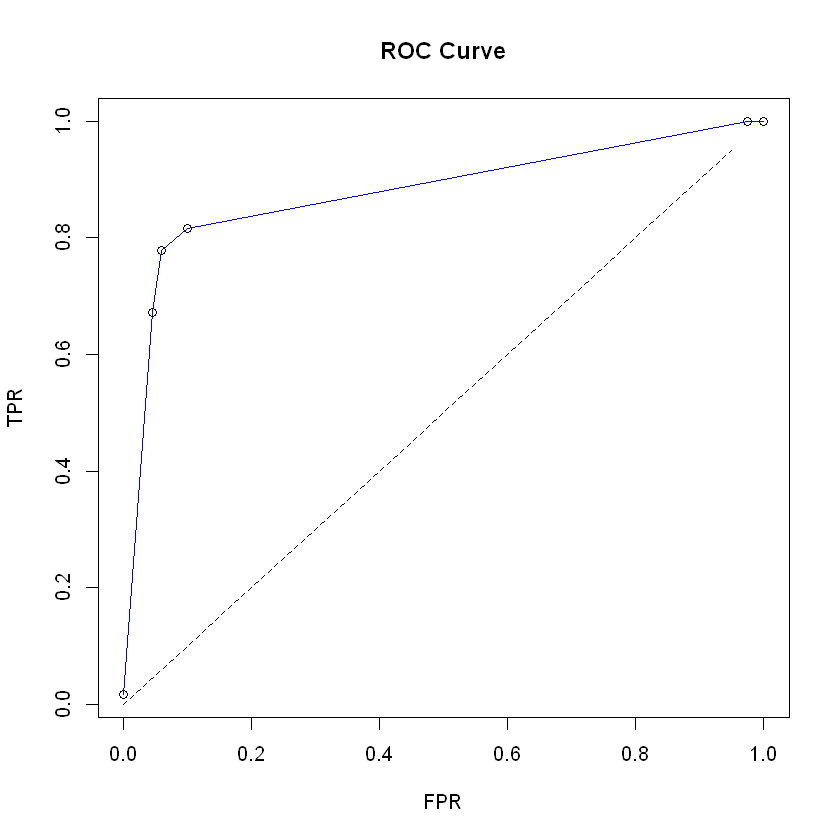

In [21]:
plot(FPR,TPR)
lines(FPR,TPR,col="blue")
lines(thresholds,thresholds,lty=2)
title("ROC Curve")

In [22]:
require(pracma)
AUC <- trapz(FPR,TPR)
AUC
AUC <- sum(abs(diff(FPR)) * (head(TPR,-1)+tail(TPR,-1)))/2
AUC

Loading required package: pracma

Warning message:
"package 'pracma' was built under R version 4.0.4"

Attaching package: 'pracma'


The following objects are masked from 'package:kernlab':

    cross, eig, size




[1] -0.8786254

[1] 0.8786254

## Exercise 3 - Ensemble learning : random forest

Random Forests (RF) is an ensemble learning technique proposed by Breiman which combines bagging and random feature selection by using a large number of non pruned decision trees.
Hence, Each individual tree is trained on a different subset of samples (due to bagging), as well as a different subset of features (due to random feature selection)
The random feature selection for every tree allows to decorrelate the predictions of the different trees. 
The aggregation of decorrelated classifiers allows to reduce the variance of the final prediction.
In the case of classification, the aggregation is performed by majority vote (i.e. the class that is predicted by the largest number of individual classifiers is selected as the prediction).
In the case of regression, the aggregation is performed by performing the average of the individual predictions.

For this exercise you need to:
- Implement a random forest with five trees from your (simple data partition) DT. Do not use the *randomForest* package.
- Test the difference in accuracy with 8 and 20 features per tree.
- Implement a 10-fold cross-validation for assessing your RF. Plot the performances according to the number of trained trees. 
- Bonus: Repeat the previous steps using the  *randomForest* package.

Here is an implementation helper:

* The number of trees is a compromise between training time and performance.
* Each tree is built on a subset of features, a good heuristic being the squared root of the total number of features, drawn randomly.
* For a new sample, the predicted class is simply the mean of predicted probabilities on all trained trees.


In [23]:
n_trees <- 5 
features_per_tree <- 20
threshold <- 0.5

spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

Y_trees <- numeric()

for(i in 1:n_trees){
    #3.1 Sample the features
    selected_features <- sample(1:(ncol(spam)-1),features_per_tree)
    
    #3.2 Take the group as a hold out or train data set with bootstrap for each tree
    bootstrap_idx <- sample(1:half_split,replace = T)
    train_data <- spam[spam_idx[bootstrap_idx],c(selected_features,target_variable)]
    
    #3.3 Take the remaining groups as a test data set
    test_data <- spam[spam_idx[(half_split+1):nrow(spam)],c(selected_features,target_variable)]
    print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
    
    #3.4 Fit a model on the training set and evaluate it on the test set
    model <- rpart(type ~ ., method="class",data=train_data)
    Y_pred <- predict(model,subset(test_data, select=-c(type)))
    
    #3.5 Store the prediction of each tree (2 is to take only the P(Y="spam"|x))
    Y_trees <- cbind(Y_trees,Y_pred[,2])
}

# Calculate the ensemble prediction
Y_hat <- apply(Y_trees,1,mean)
Y_hat <- ifelse(Y_hat > threshold,"spam","nonspam") 

# Evaluate the predictions
Y <- test_data[,"type"]
confusion_matrix <- table(Y_hat,Y)
confusion_matrix

accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
misclassification_rate

[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"


         Y
Y_hat     nonspam spam
  nonspam    1333  155
  spam         63  750

[1] 0.09474142

[1] "[INFO] - Misclassification rate - 5 features : 0.135593220338983"
[1] "[INFO] - Misclassification rate - 10 features : 0.13515862668405"
[1] "[INFO] - Misclassification rate - 15 features : 0.143415906127771"
[1] "[INFO] - Misclassification rate - 20 features : 0.0838765754019991"
[1] "[INFO] - Misclassification rate - 25 features : 0.0877879182963929"
[1] "[INFO] - Misclassification rate - 30 features : 0.0912646675358539"
[1] "[INFO] - Misclassification rate - 35 features : 0.0951760104302477"
[1] "[INFO] - Misclassification rate - 40 features : 0.101694915254237"
[1] "[INFO] - Misclassification rate - 45 features : 0.096045197740113"
[1] "[INFO] - Misclassification rate - 50 features : 0.0964797913950456"
[1] "[INFO] - Misclassification rate - 55 features : 0.0977835723598436"


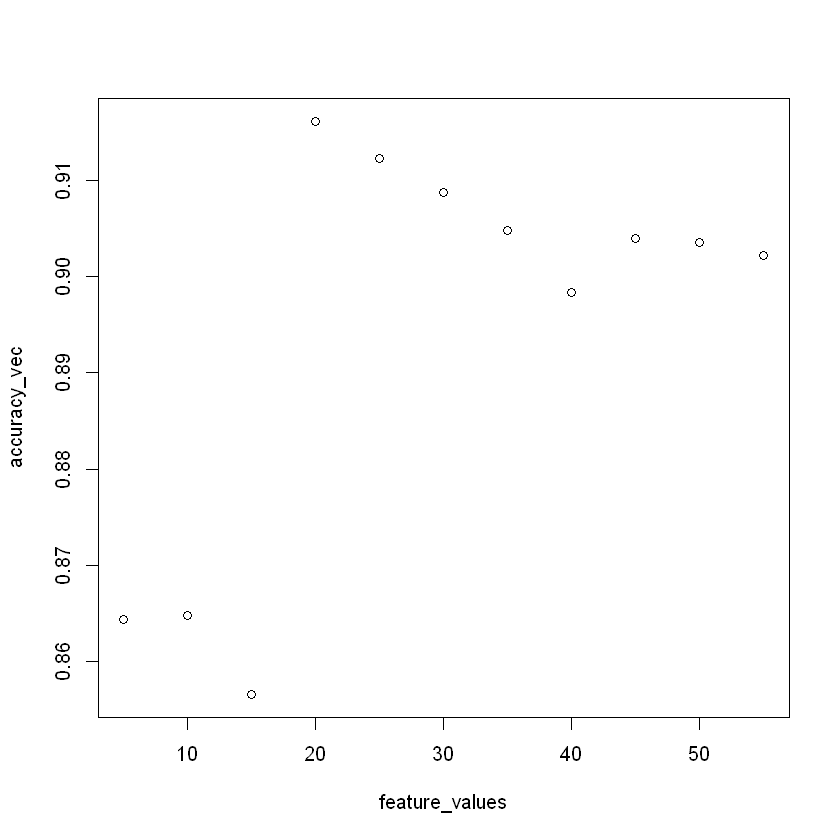

In [24]:
n_trees <- 5 
threshold <- 0.5

spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

feature_values <- seq(5,58,5)
accuracy_vec <- numeric()

for (features_per_tree in feature_values)
{
    Y_trees <- numeric()

    for(i in 1:n_trees){
        #3.1 Sample the features
        selected_features <- sample(1:(ncol(spam)-1),features_per_tree)
        
        #3.2 Take the first half of the dataset as a training data set with bootstrap for each tree
        bootstrap_idx <- sample(1:half_split,replace = T)
        train_data <- spam[spam_idx[bootstrap_idx],c(selected_features,target_variable)]

        #3.3 Take the second half of the dataset as a hold out or test data set
        test_data <- spam[spam_idx[(half_split+1):nrow(spam)],c(selected_features,target_variable)]
        #print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.4 Fit a model on the training set and evaluate it on the test set
        model <- rpart(type ~ ., method="class",data=train_data)
        Y_pred <- predict(model,subset(test_data, select=-c(type)))

        #3.5 Store the prediction of each tree (2 is to take only the P(Y="spam"|x))
        Y_trees <- cbind(Y_trees,Y_pred[,2])
    }

    # Calculate the ensemble prediction
    Y_hat <- apply(Y_trees,1,mean)
    Y_hat <- ifelse(Y_hat > threshold,"spam","nonspam") 

    # Evaluate the predictions
    Y <- test_data[,"type"]
    confusion_matrix <- table(Y_hat,Y)
    confusion_matrix

    accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
    misclassification_rate = 1 - accuracy
    accuracy_vec <- cbind(accuracy_vec,accuracy)
    print(paste("[INFO] - Misclassification rate -",features_per_tree,"features :",misclassification_rate))
}

plot(feature_values,accuracy_vec)

### 10-fold crossvalidation

In [25]:
k = 10
n_trees <- 5 
features_per_tree <- 20

target_variable <- ncol(spam)
accuracy_vec <- array(0,k)
threshold <- 0.5

# 1. Shuffle the dataset randomly.
spam_idx <- sample(1:nrow(spam))

# 2. Split the dataset into k groups
max <- ceiling(nrow(spam)/k)
splits <- split(spam_idx, ceiling(seq_along(spam_idx)/max))

# 3. For each unique group:
for (i in 1:k){
    
    Y_trees <- numeric()
    
    for(j in 1:n_trees){
        #3.1 Select features for the tree
        selected_features <- sample(1:(ncol(spam)-1),features_per_tree)
        
        #3.2 Take the group as a hold out or test data set
        test_data <- spam[splits[[i]],c(selected_features,target_variable)]

        #3.3 Take the remaining groups as a training data set with bootstrap for each tree
        bootstrap_idx <- sample(-splits[[i]],replace = T)
        train_data <- spam[bootstrap_idx,c(selected_features,target_variable)]
        #print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.4 Fit a model on the training set and evaluate it on the test set
        model <- rpart(type ~ ., method="class",data=train_data)
        Y_pred <- predict(model,subset(test_data, select=-c(type)))

        # Store the prediction of each tree
        Y_trees <- cbind(Y_trees,Y_pred[,2])
    }
    
    
    # Calculate the ensemble prediction
    Y_hat <- apply(Y_trees,1,mean)
    Y_hat <- ifelse(Y_hat > threshold,"spam","nonspam") 

    # Evaluate the predictions
    Y <- test_data[,"type"]
    confusion_matrix <- table(Y_hat,Y)
    confusion_matrix
    
    #3.4 Retain the evaluation score and discard the model
    accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
    misclassification_rate = 1 - accuracy_vec[i]
    print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
}

#4. Summarize the accuracy of the model using the sample of model evaluation scores
print(paste("[INFO] - Mean misclassification rate:",1-mean(accuracy_vec)))

[1] "[INFO] - Misclassification rate - 1 fold: 0.0607375271149675"
[1] "[INFO] - Misclassification rate - 2 fold: 0.0976138828633406"
[1] "[INFO] - Misclassification rate - 3 fold: 0.0845986984815619"
[1] "[INFO] - Misclassification rate - 4 fold: 0.106290672451193"
[1] "[INFO] - Misclassification rate - 5 fold: 0.0911062906724512"
[1] "[INFO] - Misclassification rate - 6 fold: 0.0954446854663774"
[1] "[INFO] - Misclassification rate - 7 fold: 0.112798264642082"
[1] "[INFO] - Misclassification rate - 8 fold: 0.0694143167028199"
[1] "[INFO] - Misclassification rate - 9 fold: 0.0997830802603037"
[1] "[INFO] - Misclassification rate - 10 fold: 0.0929203539823009"
[1] "[INFO] - Mean misclassification rate: 0.0910707772637399"


### Using RandomForest package

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




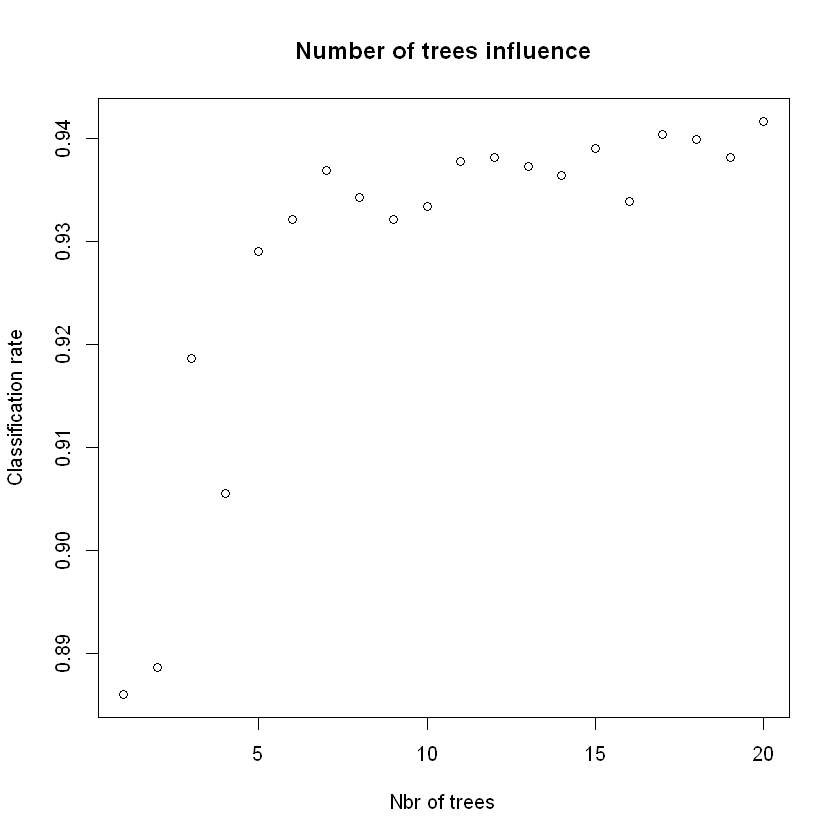

In [26]:
library("randomForest")
n_trees <- 20
accuracy_vec <- array(0,n_trees)

spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

for (i in 1:n_trees){ #print(i)
    #3.1 Take the first half of the dataset as a training data set
    train_data <- spam[spam_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
    test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i)
    
    accuracy_vec[i] = (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }

plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate") 

## Exercise 4 - Ensemble learning : Boosting (Ada Boost)

Boosting is an additional generic ensemble technique which attempts to boost the accuracy of any given learning algorithm.
The focus of boosting methods is to produce a series of weak learners in order to produce a powerful combination. 
A weak learner is a learner that has accuracy only slightly better than chance.
In boosting, the training set used for each member of the series is chosen based on the performance of the earlier classifier(s) in the series. 
Examples that are incorrectly predicted by previous classifiers in the series are chosen more often than examples that were correctly predicted.
Thus Boosting attempts to produce new classifiers that are better able to predict examples for which the current ensemble’s performance is poor. 
Unlike Bagging (employed in Random Forests), the resampling of the training set is dependent on the performance of the earlier classifiers, which prevents a parallel implementation of the ensembling procedure.

For this exercise you need to:
- Implement a boosting ensemble of 15 decision trees using Ada Boost (cf. 11.3.1)
- The initial sampling probability for each sample $i$ is $w_i = \frac{1}{N}$ (with $1 \leq i \leq N$, $N$ being the number of samples in train set). 
- After the first tree, $w_i$ is adjusted according to the classification performances:
    \begin{equation} w_i = w_i \begin{cases} e^{-\alpha_j} & \text{if sample $i$ correctly classified} \\ e^{\alpha_j} & \text{if sample $i$ incorrectly classified} \end{cases} \end{equation}
    \begin{equation} \alpha_j = \log(\frac{1-ER_j}{ER_j}) \end{equation}
    \begin{equation} ER_j = \frac{\sum_{i=1}^{N} w_{i} I\left(y_{i} \neq h_{j}\left(x_{i}\right)\right)}{\sum_{i=1}^{N} w_{i}} \end{equation}
      
- The prediction of the boosting ensemble is defined as a linear combination (weighted by $\alpha_j$) of the outputs of the different trees:
    \begin{equation} h_{boo} = sign\left( \sum_{j=1}^{m} = \alpha_j*h_j(x)\right) \end{equation}

    

Here is an implementation helper (multiple variants exist) :

- The number of trees is a compromise between training time and performance. 
- The trees are usually depth-forced : add *control=tree.control(Ntrain,mincut=10)* as a parameter to *tree()*.
- For this exercice, we will use the *tree* package. It is therefore easier to recode the spam labels as -1/+1.

In [27]:
nsample <- nrow(spam)
data(spam)

Now compare, in terms of misclassifcation, a regular tree against a boosted 15-trees model. You can re-use the code of the ''very simple partition'' as for the first tree we designed.

In [28]:
library(tree)

# Parameters of the algorithm
n_trees <- 15
N <- nrow(spam)

alpha_vec <- array(NA,n_trees)
misclassification_vec <- array(NA,n_trees)

# Rescaling target variable
data(spam)
spam$type <- ifelse(spam$type == "nonspam",-1,1) # Data in {-1,+1}
target_variable <- ncol(spam)


# 50/50 data split
spam_idx <- sample(1:N)
half_split <- floor(N/2)
train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]


# Prediction - Single tree
tree_model <-tree(type ~ ., train_data,
                  control=tree.control(half_split,mincut=10))
Y_pred_tree <- sign(predict(tree_model,test_data))

# Boosting
Y_pred_boosting <- rep(0,length(test_data))
w <- array(1/half_split,half_split)

set.seed(555)

# For each boosting iteration
for(j in 1:n_trees){
    
    #1. Sample from the training set
    selected_samples <- sample(1:half_split,prob=w,replace=TRUE)
    
    print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
    
    #2. Fit a model on the training set and evaluate it on the training set
    tree_model <-tree(type ~ ., train_data[selected_samples,],
                  control=tree.control(half_split,mincut=10))
    Y_pred_train <- sign(predict(tree_model,train_data))
    
    #3. Compute misclassification on training set
    misclassification_vec[j] <- sum(w*as.integer(train_data$type != sign(Y_pred_train)))/sum(w)
    
    #4. Computation of alpha and updating of resampling weight
    alpha_vec[j] <- log((1-misclassification_vec[j])/misclassification_vec[j])
    w <- w * exp(alpha_vec[j]*as.integer(train_data$type != sign(Y_pred_train)))
    
    #5. Normalize the weights in order to represent a true distribution
    w <- w/sum(w)
    
    #6. Compute the predictions on the testing set and weight them by alpha
    Y_pred_boosting<-Y_pred_boosting+alpha_vec[j]*predict(tree_model,test_data)


}

# Misclassification error comparation
misclassification_error_base <- sum(as.integer(test_data$type != sign(Y_pred_tree)))/length(Y_pred_tree)
misclassification_error_boosting <- sum(as.integer(test_data$type != sign(Y_pred_boosting)))/length(Y_pred_boosting)

print(paste("[INFO] - Misclassification rate - Single tree:",misclassification_error_base))
print(paste("[INFO] - Misclassification rate - Boosted tree:",misclassification_error_boosting))


[1] "[INFO] - Training set size: 2300 - Testing set size 2301"


Warning message in Y_pred_boosting + alpha_vec[j] * predict(tree_model, test_data):
"longer object length is not a multiple of shorter object length"


[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Misclassification rate - Single tree: 0.0999565406345067"
[1] "[INFO] - Misclassification rate - Boosted